In [ ]:
import pandas as pd
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import os

df = pd.read_csv(r'C:\Users\georg\OneDrive\Desktop\DEA\Python for Analytics\Analytics_Statistics\customer_transaction_data.csv')

# Preview the data
print(df.head(10))

   CustomerID  MonthlyCharges  TenureMonths Churned ChargeBucket
0           1           79.93             2      No       Medium
1           2           67.23            17      No       Medium
2           3           82.95            33      No       Medium
3           4          100.46             9      No         High
4           5           65.32            43      No       Medium
5           6           65.32            48      No       Medium
6           7          101.58            39      No         High
7           8           85.35            42     Yes       Medium
8           9           60.61            26      No       Medium
9          10           80.85            50      No       Medium


In [6]:
# Central Tendency Measures
mean = df['MonthlyCharges'].mean()
median = df['MonthlyCharges'].median()
mode = df['MonthlyCharges'].mode()[0]  # mode() returns a Series

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")

# Spread / Dispersion Measures
std_dev = df['MonthlyCharges'].std()
variance = df['MonthlyCharges'].var()
range_val = df['MonthlyCharges'].max() - df['MonthlyCharges'].min()
iqr = df['MonthlyCharges'].quantile(0.75) - df['MonthlyCharges'].quantile(0.25)

print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Range: {range_val:.2f}")
print(f"IQR (Interquartile Range): {iqr:.2f}")

Mean: 72.91
Median: 71.18
Mode: 65.32
Standard Deviation: 31.83
Variance: 1012.99
Range: 323.82
IQR (Interquartile Range): 25.96


Skewness:
 CustomerID        0.000000
MonthlyCharges    4.140285
TenureMonths      0.065376
dtype: float64

 Kurtosis:
 CustomerID        -1.200000
MonthlyCharges    28.574482
TenureMonths      -1.303213
dtype: float64


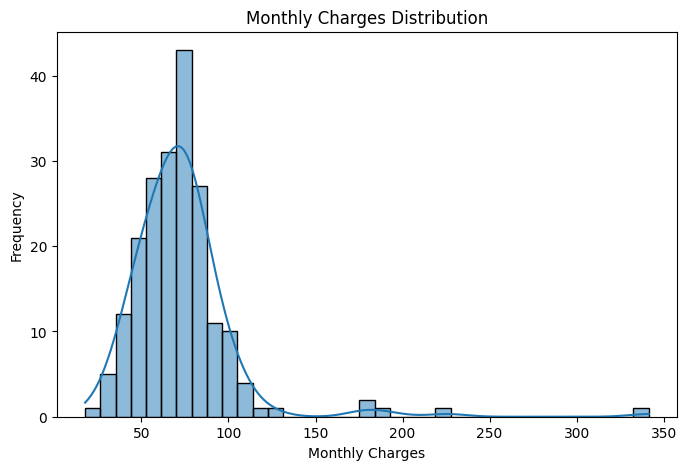

In [7]:
df.describe()

# Skewness and Kurtosis
print("Skewness:\n", df.skew(numeric_only=True))
print("\n Kurtosis:\n", df.kurtosis(numeric_only=True))

# Visualize distributions

# Create "plots" folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Create and save the plot
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.savefig("plots/monthly_charges_distribution.png")
# Optional: display the plot
plt.show()

In [8]:
print(df)

     CustomerID  MonthlyCharges  TenureMonths Churned ChargeBucket
0             1           79.93             2      No       Medium
1             2           67.23            17      No       Medium
2             3           82.95            33      No       Medium
3             4          100.46             9      No         High
4             5           65.32            43      No       Medium
..          ...             ...           ...     ...          ...
195         196           77.71             5     Yes       Medium
196         197           52.32            29     Yes          Low
197         198           73.07            37      No       Medium
198         199           71.16            38     Yes       Medium
199         200           47.14             8      No          Low

[200 rows x 5 columns]


In [ ]:
# IQR Method
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
outliers_iqr = df[(df['MonthlyCharges'] < (Q1 - 1.7 * IQR)) | (df['MonthlyCharges'] > (Q3 + 1.7 * IQR))]
print(f"{outliers_iqr}")
print(f"Outliers using IQR method: {len(outliers_iqr)}")

# Z-Score Method
from scipy.stats import zscore # type: ignore
df['z_score'] = zscore(df['MonthlyCharges'])
outliers_z = df[df['z_score'].abs() > 3]
print(f"Outliers using Z-score method: {len(outliers_z)}")


     CustomerID  MonthlyCharges  TenureMonths Churned ChargeBucket
24           25          177.33            66     Yes    Very High
43           44          191.94            53      No    Very High
85           86          179.88            62     Yes    Very High
125         126          341.43            46      No    Very High
144         145          225.60            23     Yes    Very High
Outliers using IQR method: 5
Outliers using Z-score method: 5


In [ ]:
# P(Churned = Yes)
p_churn = (df['Churned'] == 'Yes').mean()
print(f"P(Churned = Yes): {p_churn:.2f}")

# # Conditional Probability: P(Churned = Yes | MonthlyCharges > 100)
# high_charge = df['MonthlyCharges'] > 100
# p_churn_given_high_charge = ((df['Churned'] == 'Yes') & high_charge).sum() / high_charge.sum()
# print(f"P(Churned | MonthlyCharges > 100): {p_churn_given_high_charge:.2f}")

P(Churned = Yes): 0.30


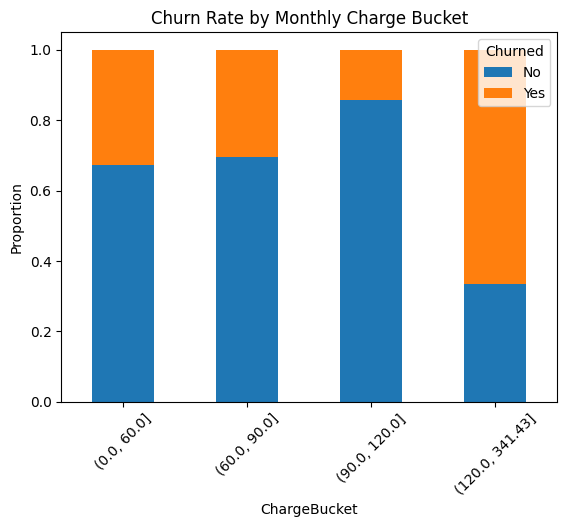

In [13]:
# Churn Rate by Monthly Charge Range
df['ChargeBucket'] = pd.cut(df['MonthlyCharges'], bins=[0, 60, 90, 120, df['MonthlyCharges'].max()])
churn_by_bucket = df.groupby('ChargeBucket', observed=True)['Churned'].value_counts(normalize=True).unstack()

churn_by_bucket.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Monthly Charge Bucket')
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.savefig("plots/Churn_Rate_by_Monthly_Charge_Bucket.png")
plt.show()


[67.61600000000001, 68.57400000000001, 68.74566666666666, 68.03666666666666, 81.17333333333335, 74.97666666666667, 69.66666666666667, 82.59533333333334, 66.72966666666666, 67.167, 70.42000000000002, 79.65100000000001, 77.15566666666668, 81.50566666666667, 69.90266666666666, 66.80900000000001, 74.89733333333334, 76.02366666666668, 76.5, 66.31333333333333, 76.17966666666666, 81.90366666666667, 68.46199999999999, 76.92699999999999, 78.14933333333335, 77.85033333333334, 76.69333333333333, 68.615, 69.23100000000001, 88.45333333333333, 72.95066666666666, 71.18333333333334, 74.17033333333333, 81.64133333333334, 72.83733333333333, 77.15266666666668, 69.03999999999999, 69.321, 81.14799999999998, 70.97466666666668, 69.82199999999999, 75.66233333333335, 74.661, 75.98266666666667, 76.50833333333331, 78.465, 72.319, 77.66433333333333, 70.839, 66.05033333333333, 73.67933333333333, 69.74366666666667, 66.837, 70.61333333333333, 73.20866666666666, 73.37966666666667, 69.69066666666666, 77.098, 72.482666

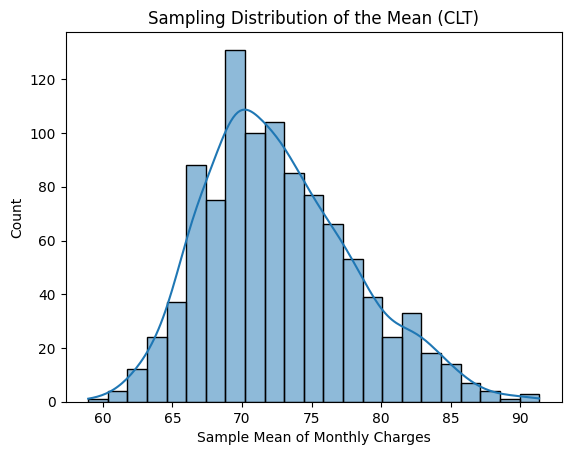

In [15]:
sample_means = [df['MonthlyCharges'].sample(30).mean() for _ in range(1000)]
print(sample_means)

sns.histplot(sample_means, kde=True)
plt.title("Sampling Distribution of the Mean (CLT)")
plt.xlabel("Sample Mean of Monthly Charges")
plt.savefig("plots/Sampling_Distribution_of_the_Mean.png")
plt.show()

Correlation Matrix:
                MonthlyCharges  TenureMonths
MonthlyCharges        1.000000      0.028376
TenureMonths          0.028376      1.000000


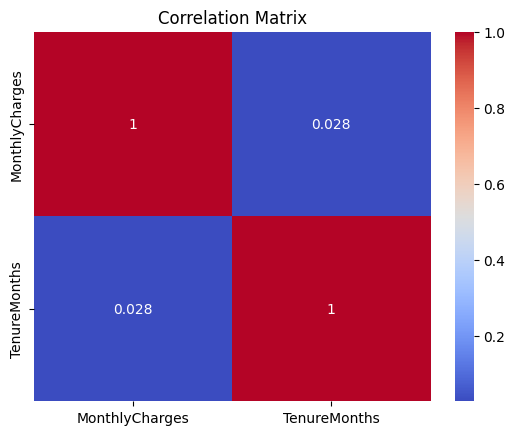

In [16]:
correlation = df[['MonthlyCharges', 'TenureMonths']].corr()
print("Correlation Matrix:")
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("plots/Correlation_Matrix.png")
plt.show()


In [ ]:
from scipy.stats import ttest_ind # type: ignore

churned = df[df['Churned'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churned'] == 'No']['MonthlyCharges']

t_stat, p_value = ttest_ind(churned, not_churned)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Statistically significant difference in charges between churned and not churned.")
else:
    print("Result: No significant difference.")


T-Statistic: 0.69
P-Value: 0.4917
Result: No significant difference.


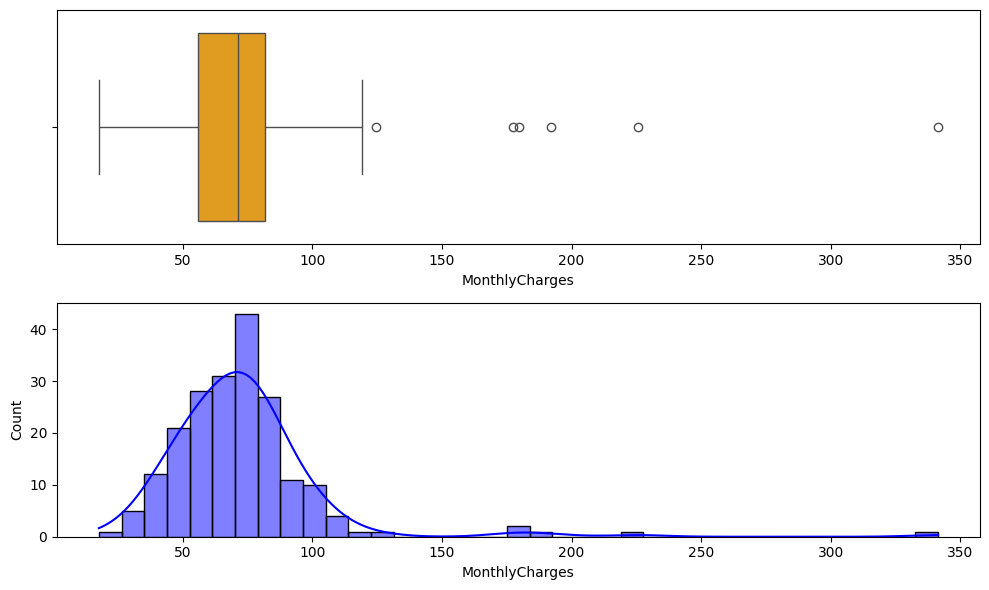

In [20]:
# Boxplot + Histogram
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sns.boxplot(x=df['MonthlyCharges'], ax=ax[0], color='orange')
sns.histplot(df['MonthlyCharges'], kde=True, ax=ax[1], color='blue')
plt.tight_layout()
plt.savefig('plots/boxplot_and_histogram.png')
plt.show()

In [21]:
df['ChargeBucket'] = pd.cut(df['MonthlyCharges'], bins=[0, 60, 90, 120, df['MonthlyCharges'].max()],
                            labels=['Low', 'Medium', 'High', 'Very High'])

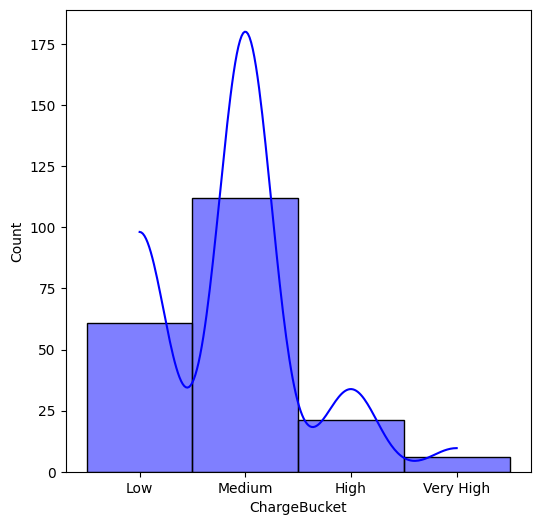

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.histplot(df['ChargeBucket'], kde=True, color='blue')
plt.savefig('plots/ChargeBucket_Distribution.png')
plt.show()
     